In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.datasets import make_circles
from sklearn.datasets import make_moons


In [4]:
X, Y = make_moons(n_samples=500,  shuffle=True,  noise=0.2, random_state=3)

In [5]:
print(X.shape, Y.shape)

(500, 2) (500,)


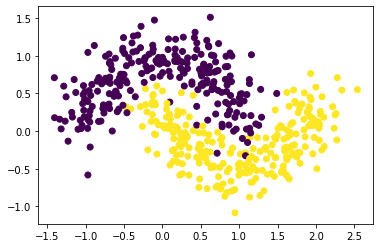

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=Y);

In [7]:
input_size = 2
layers = [4, 3]
output = 2

In [8]:
# a = np.array([[10, 20], [30, 40]])
# print(np.sum(a, axis = 1, keepdims=True))

In [9]:
def softmax(a):
    ea = np.exp(a)
    return ea/np.sum(ea,axis=1,keepdims=True)

In [10]:
softmax(np.array([[10, 20], [20, 20]])) # higher the activation higher the probablity

array([[4.53978687e-05, 9.99954602e-01],
       [5.00000000e-01, 5.00000000e-01]])

In [11]:
class NeuralNetwork:
    def __init__(self,input_size,layers,output_size):
        np.random.seed(0)
        model = {}
        model['W1'] = np.random.randn(input_size,layers[0]) 
        model['b1'] = np.zeros((1,layers[0]))
        
        model['W2'] = np.random.randn(layers[0],layers[1])
        model['b2'] = np.zeros((1,layers[1]))
        
        model['W3'] = np.random.randn(layers[1],output_size)
        model['b3'] = np.zeros((1,output_size))
        
        self.model = model
        
    def forward(self,x):

        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1,b2,b3 = self.model['b1'],self.model['b2'],self.model['b3']
        
        z1 = np.dot(x,W1) + b1
        a1 = np.tanh(z1)
        
        z2 = np.dot(a1,W2) + b2 
        a2 = np.tanh(z2)
        
        z3 = np.dot(a2,W3) + b3
        y_ = softmax(z3)
        
        #Store the outputs of each layer for back-propagation
        self.activation_outputs = (a1,a2,y_)
        
        return y_
        
    def backward(self,x,y,learning_rate=0.001):
        
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        a1,a2,y_ = self.activation_outputs
        
        delta3 = y_ - y
        
        dw3 = np.dot(a2.T,delta3) #)h2+1,C) => (h2+1,m) X (m,C) 
        db3 = np.sum(delta3,axis=0)
        
        delta2 = (1-np.square(a2))*np.dot(delta3,W3.T)  #(m,h2+1) => (m,h2+1) *(m,C X C,h2+1)
        dw2 = np.dot(a1.T,delta2)  
        db2 = np.sum(delta2,axis=0)
        
        delta1 = (1-np.square(a1))*np.dot(delta2,W2.T) 
        dw1 = np.dot(X.T,delta1)
        db1 = np.sum(delta1,axis=0)
        
        self.model['W1'] -= learning_rate*dw1
        self.model['W2'] -= learning_rate*dw2
        self.model['W3'] -= learning_rate*dw3
        
        self.model['b1'] -= learning_rate*db1
        self.model['b2'] -= learning_rate*db2
        self.model['b3'] -= learning_rate*db3
        
        
    def predict(self,x):
        y_out = self.forward(x)
        return np.argmax(y_out,axis=1)
    
    def summary(self):
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        a1,a2,y_ = self.activation_outputs
        
        print("W1 ",W1.shape)
        print("A1 ",a1.shape)
        
        print("W2 ",W2.shape)
        print("A2 ",a2.shape)
        
        print("W3 ",W3.shape)
        print("Y_ ",y_.shape)

In [12]:
def loss(y_oht,p):
    l = -np.mean(y_oht*np.log(p))
    return l    

def one_hot(y,depth):
    m = y.shape[0]
    y_oht = np.zeros((m, depth))
    y_oht[np.arange(m), y] = 1
    return y_oht

In [13]:
one_hot(np.array([0, 0, 1, 2]), 3)

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [14]:
model = NeuralNetwork(input_size=2,  layers=layers, output_size=2)

In [15]:
model.forward(X)[:5]

array([[0.99448483, 0.00551517],
       [0.85273962, 0.14726038],
       [0.98080499, 0.01919501],
       [0.14409426, 0.85590574],
       [0.93897079, 0.06102921]])

In [16]:
model.backward(X, one_hot(Y,  2))

In [17]:
# def train(x, y):
#     losses = []
#     y_oht = one_hot(y, depth=2)
#     for i in range(100):
#         y_ = model.forward(X)
#         l = loss(y_oht, y_)
#         losses.append(l)
#         if l >= 0.01:
#             model.backward(X, y_oht)
            
def train(X,Y,model,epochs,logs=True):
    """Creates and Model and Trains it!"""
    
    training_loss = []
    val_loss = []
    val_acc = []
    
    classes = len(np.unique(Y))
    Y_OHT = one_hot(Y,classes)
    losses = []
    for ix in range(epochs):
        Y_ = model.forward(X)
        l = loss(Y_OHT,Y_)
        losses.append(l)
        model.backward(X,Y_OHT)
        if(logs and ix%10==0):
            print("Epoch %d Loss %.4f"%(ix,l),end='\n')
    
    
    return losses
    #model.summary()
            

In [18]:
losses = train(X, Y, model, epochs=700)

Epoch 0 Loss 0.4079
Epoch 10 Loss 0.1628
Epoch 20 Loss 0.1098
Epoch 30 Loss 0.0917
Epoch 40 Loss 0.0792
Epoch 50 Loss 0.0698
Epoch 60 Loss 0.0628
Epoch 70 Loss 0.0573
Epoch 80 Loss 0.0530
Epoch 90 Loss 0.0496
Epoch 100 Loss 0.0470
Epoch 110 Loss 0.0448
Epoch 120 Loss 0.0431
Epoch 130 Loss 0.0417
Epoch 140 Loss 0.0405
Epoch 150 Loss 0.0396
Epoch 160 Loss 0.0388
Epoch 170 Loss 0.0381
Epoch 180 Loss 0.0375
Epoch 190 Loss 0.0370
Epoch 200 Loss 0.0366
Epoch 210 Loss 0.0362
Epoch 220 Loss 0.0359
Epoch 230 Loss 0.0356
Epoch 240 Loss 0.0353
Epoch 250 Loss 0.0351
Epoch 260 Loss 0.0349
Epoch 270 Loss 0.0347
Epoch 280 Loss 0.0345
Epoch 290 Loss 0.0343
Epoch 300 Loss 0.0342
Epoch 310 Loss 0.0340
Epoch 320 Loss 0.0339
Epoch 330 Loss 0.0338
Epoch 340 Loss 0.0337
Epoch 350 Loss 0.0336
Epoch 360 Loss 0.0335
Epoch 370 Loss 0.0334
Epoch 380 Loss 0.0333
Epoch 390 Loss 0.0332
Epoch 400 Loss 0.0331
Epoch 410 Loss 0.0330
Epoch 420 Loss 0.0330
Epoch 430 Loss 0.0329
Epoch 440 Loss 0.0328
Epoch 450 Loss 0.0328

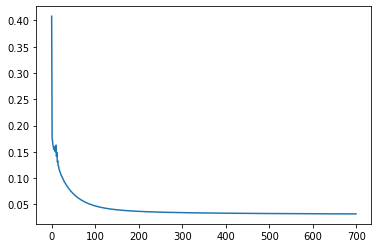

In [19]:
plt.plot(losses);

In [20]:
import sys
sys.path.insert(0, '../resources/')

In [21]:
from visualize import plot_decision_boundary

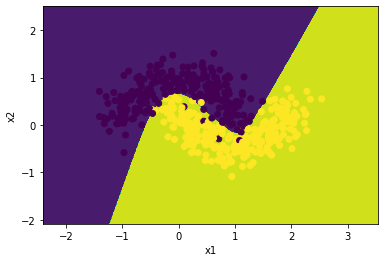

In [22]:
plot_decision_boundary(lambda x:model.predict(x),X,Y)

In [23]:
model.summary()

W1  (2, 4)
A1  (273700, 4)
W2  (4, 3)
A2  (273700, 3)
W3  (3, 2)
Y_  (273700, 2)
